# PyTorch Introduction

## PyTorch Setup

<strong style= "color:red">Pre-requisite </strong>: Working [anaconda](https://www.anaconda.com/products/individual) or [miniconda](https://docs.conda.io/en/latest/miniconda.html) enviorment.

You can install PyTorch on a separate environment or default base environment with an appropriate version from [official website](https://pytorch.org/get-started/locally/). Feel free to create a separate environment using the following commands (minimalistic setup):


`conda create --name dlm-2022 python=3.8.8` (PyTorch is not compatible with the latest version of Python `3.10`. For now, version`3.9.7` or below would do just fine.)

`conda activate dlm-2023` (Feel free to use other names instead of `dlm-2023`)

`pip3 install torch torchvision torchaudio`

`pip3 install notebook`
 
`jupyter notebook`

**`Create a new notebook and have fun!!`**
 
The above steps have been tested on *macOS*, steps may vary for *Windows/Linux*. In case of any irregularities, please refer to the previously mentioned links or reach out to  anyone on the course staff). 

You can also remove existing environments using `conda env remove --name dlm-2022`. List existing enviornments: `conda info --envs`

---

**Alternatively:** We have a similar [instruction set](https://github.com/nyumc-dl/BMSC-GA-4493-Spring2020/blob/master/lab1/lab1_pytorch_setup.pdf) from previour iterations of the course.

## Getting Started with PyTorch

In [25]:
import torch
import torch.nn as nn
import numpy as np

In [26]:
## PyTorch version
print(torch.__version__)

1.13.1


### Generating Tensors

In [27]:
# Constructing a new uninitialized tensor with given dimensions - contains only zeroes as no input is defined
x = torch.Tensor(32, 256, 256, 3) # Defaults to FloatTensor
print(x.size())
print(x.shape)
# x 

torch.Size([32, 256, 256, 3])
torch.Size([32, 256, 256, 3])


In [28]:
x = torch.IntTensor(32, 256, 256, 3)
# x

In [29]:
zeroes = torch.zeros(32, 256, 256, 3) # By default Float values are used, specify arguments for dtype parameter to change data type of tensor
# print(zeroes)
zeroes.dtype

torch.float32

In [30]:
ones = torch.ones(32, 256, 256, 3, dtype=torch.int32) 
# print(ones)
ones.dtype

torch.int32

In [31]:
# Initialize tensor from a list, numpy array
y = torch.tensor([2,3])
y

tensor([2, 3])

In [32]:
a = torch.rand(2,3) #rand generates integers between [0,1)
print(a)
b = torch.randn(2,3) #randn generates integers from standard normal distribution
print(b)

c = torch.rand([2,3]) #torch.rand outputs a 2*3 tensor even for a list input
print(c)


tensor([[0.7223, 0.7910, 0.8567],
        [0.7053, 0.0904, 0.1446]])
tensor([[-1.1835,  1.4787, -0.0774],
        [ 0.3171, -0.2946, -1.4590]])
tensor([[0.9946, 0.5207, 0.3529],
        [0.1008, 0.1413, 0.8624]])


### Tensor Operations

In [33]:
# Creates random 
y = torch.rand(16, 16, 3) 
print(f'Shape of y: {y.shape}')
print(f'Number of elements is {y.numel()} and Number of dimensions is {y.dim()}') 

#Reshaping with .view()
y = y.view([1,768])
print(f'Shape of y after reshaping: {y.shape}')
print(f'Number of elements is {y.numel()} and Number of dimensions is {y.dim()}') 

Shape of y: torch.Size([16, 16, 3])
Number of elements is 768 and Number of dimensions is 3
Shape of y after reshaping: torch.Size([1, 768])
Number of elements is 768 and Number of dimensions is 2


In [34]:
y = torch.rand(256, 256, 3) 
print(f'Shape of y: {y.shape}')

# Squeezing and Unsqueezing
print(f'Unsqueezed y: {y.unsqueeze(dim=0).shape}') #Returns a new tensor with a dimension of size one inserted at the specified position.
print(f'Squeezed y: {y.squeeze(dim=0).shape}') #Returns a new tensor with a dimension of size one inserted at the specified position.


Shape of y: torch.Size([256, 256, 3])
Unsqueezed y: torch.Size([1, 256, 256, 3])
Squeezed y: torch.Size([256, 256, 3])


In [35]:
a = torch.Tensor([2,3])
b = torch.Tensor([4,1])
print(a)
print(b)
print(a*b)
print(a.multiply(b))

tensor([2., 3.])
tensor([4., 1.])
tensor([8., 3.])
tensor([8., 3.])


In [36]:
a = torch.randn(4)
b = torch.randn(4,1)
print(f'a : {a}')
print(f'b : {b}')
print(f'a+b: {a+b}')

print(f'Adding an integer to a tensor: {torch.add(a,10)}')
print(f'Adding two tensors : {torch.add(a,b)}')
print(f'Adding two tensors with alpha scaling : {torch.add(a,b, alpha = 10)}') # sum = a + b*alpha

a : tensor([-1.1865,  1.1993, -1.3342,  0.1537])
b : tensor([[ 0.9535],
        [-0.8460],
        [-0.5963],
        [-0.9182]])
a+b: tensor([[-0.2330,  2.1528, -0.3807,  1.1072],
        [-2.0325,  0.3533, -2.1802, -0.6924],
        [-1.7828,  0.6030, -1.9305, -0.4427],
        [-2.1047,  0.2811, -2.2524, -0.7645]])
Adding an integer to a tensor: tensor([ 8.8135, 11.1993,  8.6658, 10.1537])
Adding two tensors : tensor([[-0.2330,  2.1528, -0.3807,  1.1072],
        [-2.0325,  0.3533, -2.1802, -0.6924],
        [-1.7828,  0.6030, -1.9305, -0.4427],
        [-2.1047,  0.2811, -2.2524, -0.7645]])
Adding two tensors with alpha scaling : tensor([[  8.3487,  10.7345,   8.2010,   9.6888],
        [ -9.6466,  -7.2608,  -9.7943,  -8.3065],
        [ -7.1500,  -4.7642,  -7.2977,  -5.8098],
        [-10.3684,  -7.9826, -10.5161,  -9.0283]])


In [37]:
a = torch.rand(720,420,3)
print(f'Shape of a: {a.shape}')
print(f'Shape of a transpose: {a.transpose(0,1).shape}')
print(f'Shape of a: {a.shape}') #Shape of a remains same because there was no reassignment
a.transpose_(0,1) #using an underscore reassigns and avoids creation of new memory
print(f'Shape of a after _ usage: {a.shape}')

Shape of a: torch.Size([720, 420, 3])
Shape of a transpose: torch.Size([420, 720, 3])
Shape of a: torch.Size([720, 420, 3])
Shape of a after _ usage: torch.Size([420, 720, 3])


In [38]:
# Filling
a = torch.randn(3,4)
print(a)
a.fill_(13) #.fill_ is an inplace operation, .fill does not exist 
print(a)

tensor([[ 0.4159, -1.7382, -1.5205,  2.1947],
        [-1.3273, -0.7842, -0.0137, -0.1483],
        [-1.1686,  1.6184, -0.2408, -0.8308]])
tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])


In [39]:
# Replacing
y = torch.ones(1,32)
print(y)
y[0,:]  = 0
print(y)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])


### Numpy Conversion

In [40]:
x = torch.rand(5)
print(x)
x.shape

tensor([0.7684, 0.0491, 0.2612, 0.2542, 0.9917])


torch.Size([5])

In [41]:
x.numpy()

array([0.7684196 , 0.04905468, 0.26117605, 0.25416094, 0.9917029 ],
      dtype=float32)

In [42]:
x.numpy().tolist()

[0.768419623374939,
 0.04905468225479126,
 0.26117604970932007,
 0.25416094064712524,
 0.9917029142379761]

### Device

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
device,torch.cuda.is_available()

(device(type='cpu'), False)

In [45]:
x = torch.rand(1,4)

In [48]:
# x.cuda() #runs a copy of this tensor on cuda

In [49]:
x.to(device) #runs a copy of tensor on the defined device

tensor([[0.5246, 0.0762, 0.3057, 0.1796]])

### Gradient Descent with autograd

In [69]:
# Here we use PyTorch’s automatic differentiation engine - autograd to manually compute the gradient for Linear Regression

# here : f = w * x is the assumed equation of our lin regression model where w = 2 is the solution
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) #requires_grad_()’s main use case is 
                                                              #to tell autograd to begin recording 
                                                              #operations on a Tensor


# model output
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}') # predicting output for x = 5

# Training
learning_rate = 0.01
n_iters = 70

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    loss = nn.MSELoss()
    l = loss(Y, y_pred)
    print(l, Y, y_pred)

    # calculate gradients = backward pass 
    print(w.grad)
    l.backward()
    print(w.grad)  # gradient of loss with respect to w (dL/dw)

    # update weights
    # w.data = w.data - learning_rate * w.grad
#     with torch.no_grad(): # similar to requires_grad = False
    w -= learning_rate * w.grad
    print(w, w.grad)
        
    
    # zero the gradients after updating
    w.grad.zero_()
    break

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000
tensor(30., grad_fn=<MseLossBackward0>) tensor([2., 4., 6., 8.]) tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>)
None
tensor(-30.)


RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [68]:
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


### MNIST classification in pytorch

In [53]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [54]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

In [55]:
trainset = datasets.MNIST('./dataset/train', download=True, train=True, transform=transform)
valset = datasets.MNIST('./dataset/test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

27.4%

100.0%


Extracting ./dataset/train/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw


100.0%


Extracting ./dataset/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw




100.0%
100.0%


Extracting ./dataset/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/train/MNIST/raw

Extracting ./dataset/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/train/MNIST/raw



100.0%


Extracting ./dataset/test/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw


100.0%
23.8%


Extracting ./dataset/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw



100.0%
100.0%


Extracting ./dataset/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/test/MNIST/raw

Extracting ./dataset/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/test/MNIST/raw



In [72]:
dataiter = iter(trainloader)
images, labels = next(dataiter) #next function only outputs the next batch
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [75]:
# for i in dataiter:
#     print(i)
#     break

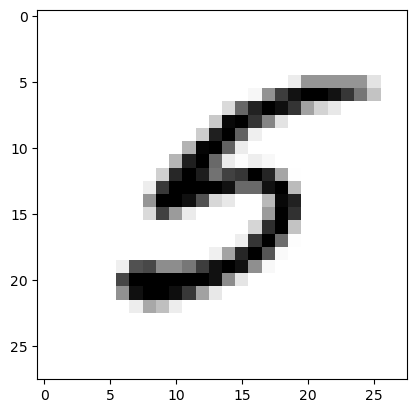

In [57]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

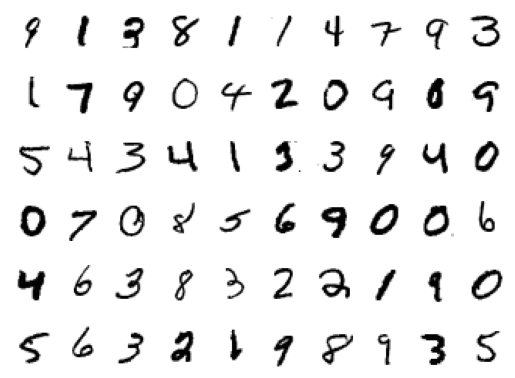

In [78]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [85]:
input_size = 784  # each image is 28x28
hidden_sizes = [128, 64]  #hidden layer sizes
output_size = 10 # number of classes

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [86]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
print(f'Shape of images: {images.shape}')
images = images.view(images.shape[0], -1)
print(f'Shape after reshaping: {images.shape}')

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print(logps.shape, labels.shape)

Shape of images: torch.Size([64, 1, 28, 28])
Shape after reshaping: torch.Size([64, 784])
torch.Size([64, 10]) torch.Size([64])


In [87]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [62]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6445118948134151
Epoch 1 - Training loss: 0.2831958942194737
Epoch 2 - Training loss: 0.21993345297031056
Epoch 3 - Training loss: 0.1774962707889328
Epoch 4 - Training loss: 0.14762210992695107
Epoch 5 - Training loss: 0.1281960285745307
Epoch 6 - Training loss: 0.11221999419865006
Epoch 7 - Training loss: 0.10151487652128979
Epoch 8 - Training loss: 0.09033684154053026
Epoch 9 - Training loss: 0.08144754327452386
Epoch 10 - Training loss: 0.07387980477892354
Epoch 11 - Training loss: 0.0674759958230797
Epoch 12 - Training loss: 0.061755281646174
Epoch 13 - Training loss: 0.05655732964560675
Epoch 14 - Training loss: 0.05212183529957891

Training Time (in minutes) = 1.754872234662374


In [63]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


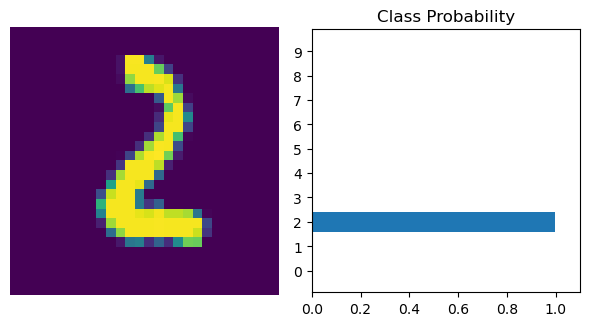

In [64]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [65]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9716


In [66]:
!mkdir model

In [67]:
torch.save(model, './model/mnist_model.pt') 